This code is to develop machine learning models to predict e-commerce visitors’ purchasing intention. 
The steps carried out are:

  *   Data exploration
  *   Data pre-processing
  *   Machine learning method
  *   Performance evaluation
  *   Result analysis and discussion

Student Id: C2105259

Date: 05 February 2021

# New section

In [1]:
# Import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Get the data

In [3]:
# Load e-commerce visitors’ Coursework_1_data set from download path
e_visitor = pd.read_csv('/content/sample_data/Coursework_1_data.csv')


Inspection of the Data

In [4]:
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False) # print all columns in full, prevent line break

print('\nDimensions of the array',e_visitor.shape)
print('\nConcise summary of the dataframe',e_visitor.info())
print('\nColumn names of the dataset...... \n', e_visitor.columns)
print('\nBelow is the first few lines of the dataset......\n', e_visitor.head(10))
print('\nBelow is the statistics of the dataset......\n', e_visitor.describe())


Dimensions of the array (12330, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null

In [5]:
e_visitor.isna().sum() # check for any null or missing values in the dataset.

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Data Exploration

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ef3253438>,
      dtype=object)

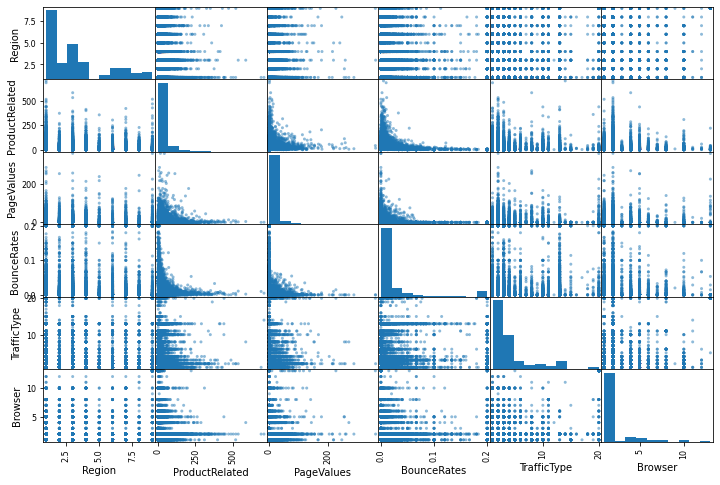

In [6]:
# use scatter_matrix of pandas.plotting to understand the relationship between the columns
from pandas.plotting import scatter_matrix
scatter_matrix(e_visitor[['Region','ProductRelated','PageValues','BounceRates','TrafficType','Browser']], figsize=(12, 8))

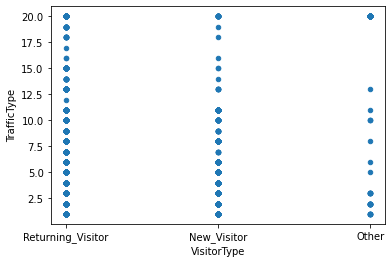

In [7]:
# use plot of pandas DataFrame
e_visitor.plot(kind='scatter', x='VisitorType', y='TrafficType')

In [8]:
# correlation matrix to understand the colinearity between columns 
corr_matrix = e_visitor.corr()
print(corr_matrix)

                         Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems   Browser    Region  TrafficType   Weekend   Revenue
Administrative                 1.000000                 0.601583       0.376850                0.255848        0.431119                 0.373939    -0.223563  -0.316483    0.098990   -0.094778         -0.006347 -0.025035 -0.005487    -0.033561  0.026417  0.138917
Administrative_Duration        0.601583                 1.000000       0.302710                0.238031        0.289087                 0.355422    -0.144170  -0.205798    0.067608   -0.073304         -0.007343 -0.015392 -0.005561    -0.014376  0.014990  0.093587
Informational                  0.376850                 0.302710       1.000000                0.618955        0.374164                 0.387505    -0.116114  -0.163666    0.048632   -0.048219         -0.0095

# Data PreProcessing

Preprocessing Pipeline & ColumnTransformer
We now put all transformations using Pipeline & ColumnTransformer  to make code tidy.


In [11]:
ecom_x = e_visitor[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend']]
ecom_y = e_visitor[['Revenue']]

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
#from sklearn.compose import make_column_transformer

# transformer for categorical features
categorical_features = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Month']
categorical_transformer = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = 'most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

# transformer for numerical features
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'median')),
        ('scaler', StandardScaler())
    ]
)

# combine them in a single ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)


ecom_processed = preprocessor.fit_transform(ecom_x)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, suppress=True, precision=2)

print(ecom_processed[0:20, :])

  (0, 0)	1.0
  (0, 8)	1.0
  (0, 21)	1.0
  (0, 30)	1.0
  (0, 52)	1.0
  (0, 53)	1.0
  (0, 57)	1.0
  (0, 65)	-0.6969929641233985
  (0, 66)	-0.4571914023726529
  (0, 67)	-0.39647790101721353
  (0, 68)	-0.24493050612963665
  (0, 69)	-0.6910031807070663
  (0, 70)	-0.6243475187901789
  (0, 71)	3.667188794132383
  (0, 72)	3.229315594758881
  (0, 73)	-0.31717784430961626
  (0, 74)	-0.3088213656157659
  (1, 1)	1.0
  (1, 9)	1.0
  (1, 21)	1.0
  (1, 31)	1.0
  (1, 52)	1.0
  (1, 53)	1.0
  (1, 57)	1.0
  (1, 65)	-0.6969929641233985
  :	:
  (18, 67)	-0.39647790101721353
  (18, 68)	-0.24493050612963665
  (18, 69)	-0.66851798144781
  (18, 70)	-0.6076250380931427
  (18, 71)	-0.45768299649364935
  (18, 72)	1.171472500128347
  (18, 73)	-0.31717784430961626
  (18, 74)	-0.3088213656157659
  (19, 1)	1.0
  (19, 11)	1.0
  (19, 24)	1.0
  (19, 33)	1.0
  (19, 52)	1.0
  (19, 53)	1.0
  (19, 57)	1.0
  (19, 65)	-0.6969929641233985
  (19, 66)	-0.4571914023726529
  (19, 67)	-0.39647790101721353
  (19, 68)	-0.2449305061296

In [16]:
from sklearn.preprocessing import OneHotEncoder,RobustScaler,MinMaxScaler
cat_cols = e_visitor[['OperatingSystems','Browser','Region','TrafficType','VisitorType','Month']] #considered only the categorical columns
cat_names=['OperatingSystems','Browser','Region','TrafficType','VisitorType','Month']

enc = OneHotEncoder(sparse=False, handle_unknown='ignore')    # Encoding data using OneHotEncoder in the form of array.
enc.fit(cat_cols)                                             # Fitting encoding into the categorical data.

cat_labels=list(enc.categories_[0])+list(enc.categories_[1])
cat_labels=list([item for arr in enc.categories_ for item in arr.tolist()])

enc_data =  pd.DataFrame(enc.transform(cat_cols))       
data_enc = e_visitor
data_enc[cat_labels]=enc_data                                 # Final encoded data for cat values

enc.fit(e_visitor[['Weekend','Revenue']])                  # Encoding the boolean categorical data

data_enc[['Weekend_F','Weekend','Revenue_F','Revenue']] = pd.DataFrame(enc.transform(e_visitor[['Weekend','Revenue']]))

data_enc = data_enc.drop(cat_names,axis=1)                    # Drop original columnames
data_enc = data_enc.drop(['Weekend_F','Revenue_F'],axis = 1)  # Drop one of the encoded column 
data_enc.head(20)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,New_Visitor,Other,Returning_Visitor,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X = data_enc.loc[ : , data_enc.columns != 'Revenue']   # Considered all columns except revenue from encoded data

y = data_enc[['Revenue']]                              # Considering Revenue column from encoded data

In [18]:
# Split encoded data into train and test model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,stratify=y,shuffle=True) 
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [19]:
scaler=MinMaxScaler()                               # MinMaxScaler to optimize data within range[0,1]

num_cols=['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated',
         'ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']

scaled_df=scaler.fit_transform(X_train[num_cols])   # Scaling train numerical data to be standardized.

X_train[num_cols] = scaled_df    

scaled_df=scaler.fit_transform(X_test[num_cols])    # Scaling test numerical data to be standardized.

X_test[num_cols] = scaled_df

# Model Implementation

Random Forest Classifier

In [21]:
import time
time_start = time.time()

# Using RandomForest Classifier model to implement.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

rndm_clf = RandomForestClassifier(n_estimators=100, max_depth=500, random_state=42,n_jobs=-1)

rndm_clf.fit(X_train,y_train)

y_pred = rndm_clf.predict(X_test)


# Calculate the confusion matrix.
print(confusion_matrix(y_test,y_pred))

# Calculate the classification report with applied parameters to determine accuracy,f1-score,recall,precision,support
print(classification_report(y_test,y_pred))
print(f'Time Taken:{(time.time()-time_start)}')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


[[2535   71]
 [ 247  230]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      2606
         1.0       0.76      0.48      0.59       477

    accuracy                           0.90      3083
   macro avg       0.84      0.73      0.77      3083
weighted avg       0.89      0.90      0.89      3083

Time Taken:1.0659091472625732


Hyperparameter optimization using RandomSearch on RandomForest Classifier

In [22]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
import numpy as np

tree_hyp =  dict(n_estimators = [int(x) for x in np.linspace(10, 110, num = 11)],
                max_features = ['auto', 'sqrt'],max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],
                min_samples_split = [2, 5, 10],bootstrap = [True, False])

# Define RF classification model
rndm_clf = RandomForestClassifier()

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)

# Define search
search = RandomizedSearchCV(rndm_clf, tree_hyp, n_iter=200, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# Execute search
result = search.fit(X_train, y_train)

# Summarize the result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Score: 0.9059695200655367
Best Hyperparameters: {'n_estimators': 110, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}


In [24]:
# The classification report calculation from best hyperparameter used in RF classifier to determine accuracy,f1-score,recall,precision,support.
# Calculate the confusion matrix.


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

y_pred = result.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2532   74]
 [ 248  229]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      2606
         1.0       0.76      0.48      0.59       477

    accuracy                           0.90      3083
   macro avg       0.83      0.73      0.76      3083
weighted avg       0.89      0.90      0.89      3083



Logistic Regression Model

In [26]:
import time
time_start = time.time()

# Implement using LogisticRegression Classifier model.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

log_reg = LogisticRegression(solver="liblinear", random_state=42)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)


# Calculate the confusion matrix
print(confusion_matrix(y_test,y_pred))

# Calculate the classification report with applied parameters to determine accuracy,f1-score,recall,precision,support.
print(classification_report(y_test,y_pred))
print(f'Time Taken: {(time.time()-time_start)}')

[[2555   51]
 [ 347  130]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      2606
         1.0       0.72      0.27      0.40       477

    accuracy                           0.87      3083
   macro avg       0.80      0.63      0.66      3083
weighted avg       0.86      0.87      0.85      3083

Time Taken: 0.07513260841369629


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Hyperparameter optimization using RandomSearch on LogisticRegression Model

In [27]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create dictionary with the key and there values parameters for randomized search.
lg_hyp = dict(solver = ['newton-cg','lbgfs','liblinear','saga'],
         penalty = ['none','l1','l2','elasticnet'], C = np.logspace(0, 4, num=10))

# Define Logistic Regression model
lg_clf = LogisticRegression()

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Define search
search = RandomizedSearchCV(lg_clf, lg_hyp, n_iter=200, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# Execute search
result = search.fit(X_train, y_train)

# Summarize the result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 160 is smaller than n_iter=200. Running 160 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Score: 0.8860173358864543
Best Hyperparameters: {'solver': 'saga', 'penalty': 'l1', 'C': 21.544346900318832}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [31]:
# The classification report calculated from the best hyperparameter used in RF classifier to determine accuracy,f1-score,recall,precision,support.
# Calculate the confusion matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

y_pred = result.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2520   86]
 [ 291  186]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      2606
         1.0       0.68      0.39      0.50       477

    accuracy                           0.88      3083
   macro avg       0.79      0.68      0.71      3083
weighted avg       0.86      0.88      0.86      3083



SVM Classifier (Rbf Kernel)

In [33]:
import time
time_start = time.time()

# Implemented using SVM Classifier model.
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

rbf_kernel_svm_clf = make_pipeline(StandardScaler(), 
                                    SVC(kernel="rbf", degree=3, coef0=1, C=5)) #rbf kernel SVM model

rbf_kernel_svm_clf.fit(X_train, y_train)
y_pred = rbf_kernel_svm_clf.predict(X_test)

# Calculate the confusion matrix
print(confusion_matrix(y_test,y_pred))

# The classification report calculated with applied parameters to determine accuracy,f1-score,recall,precision,support.
print(classification_report(y_test,y_pred))
print(f'Time Taken: {(time.time()-time_start)}')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[2504  102]
 [ 274  203]]
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      2606
         1.0       0.67      0.43      0.52       477

    accuracy                           0.88      3083
   macro avg       0.78      0.69      0.72      3083
weighted avg       0.86      0.88      0.87      3083

Time Taken: 3.938645124435425


Hyperparameter optimization using RandomSearch on SVM Model

In [34]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.svm import SVC

# Define search dictionary with the required parameters as key and there values for randomized search
parameters = {'kernel':('linear', 'rbf'), 'gamma':[0.1, 5], 'C':[0.001, 1, 10, 1000]}

# Define SVC classification model
model = SVC(kernel="rbf")

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)

# Define search
search = RandomizedSearchCV(model, parameters, n_iter=300, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# Execute search
result = search.fit(X_train, y_train)

# Summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 16 is smaller than n_iter=300. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Score: 0.8895317094945013
Best Hyperparameters: {'kernel': 'linear', 'gamma': 0.1, 'C': 1000}


In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

y_pred = result.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2537   69]
 [ 299  178]]
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2606
         1.0       0.72      0.37      0.49       477

    accuracy                           0.88      3083
   macro avg       0.81      0.67      0.71      3083
weighted avg       0.87      0.88      0.86      3083

